# **Introduction / Brief / Agenda**
  # **Insurance premiums are determined by a multitude of factors that influence the anticipated cost of coverage for the insurance company. This study aims to leverage historical customer data to gain valuable insights and construct a linear regression model capable of predicting insurance charges for new customers.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [4]:
plt.style.use("dark_background")

In [5]:
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv("C:\\Users\\raghu\\Downloads\\new_insurance_data.csv")

In [7]:
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [8]:
# ordered data->label encoding
#unordered data->one hot encoding

In [9]:
#shape inspection
data.shape

(1338, 13)

In [10]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [12]:
#data describe->statistical info about the data
data.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [13]:
#data consists of the null values
data.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [14]:
data.isnull().sum().sum()

52

In [15]:
data["charges"].max()

63770.42801

<AxesSubplot:xlabel='charges', ylabel='Density'>

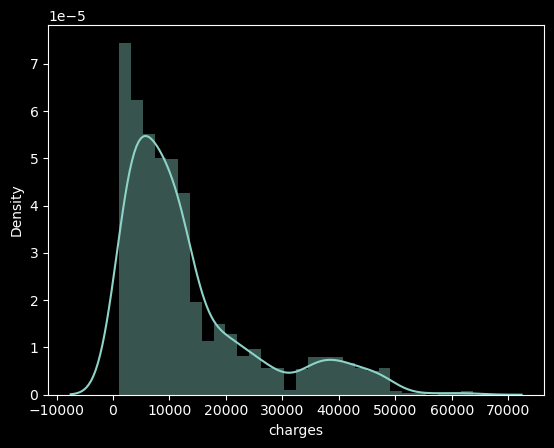

In [16]:
sns.distplot(data["charges"]) #distribution plot

# Data preprocessing

In [21]:
# cleaning the data

In [22]:
data.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [23]:
data

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [24]:
data["age"].fillna(data["age"].mean(),inplace=True)

In [25]:
data["children"].value_counts()

0.0    574
1.0    321
2.0    240
3.0    156
4.0     25
5.0     17
Name: children, dtype: int64

In [27]:
data["NUmber_of_past_hospitalizations"].value_counts()

1.0    957
2.0    227
0.0    150
3.0      2
Name: NUmber_of_past_hospitalizations, dtype: int64

In [29]:
for i in data.select_dtypes("number").columns:
    data[i].fillna(data[i].mean(),inplace=True)

In [31]:
data.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [32]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges


# Exploratory data analysis

Text(0, 0.5, 'density')

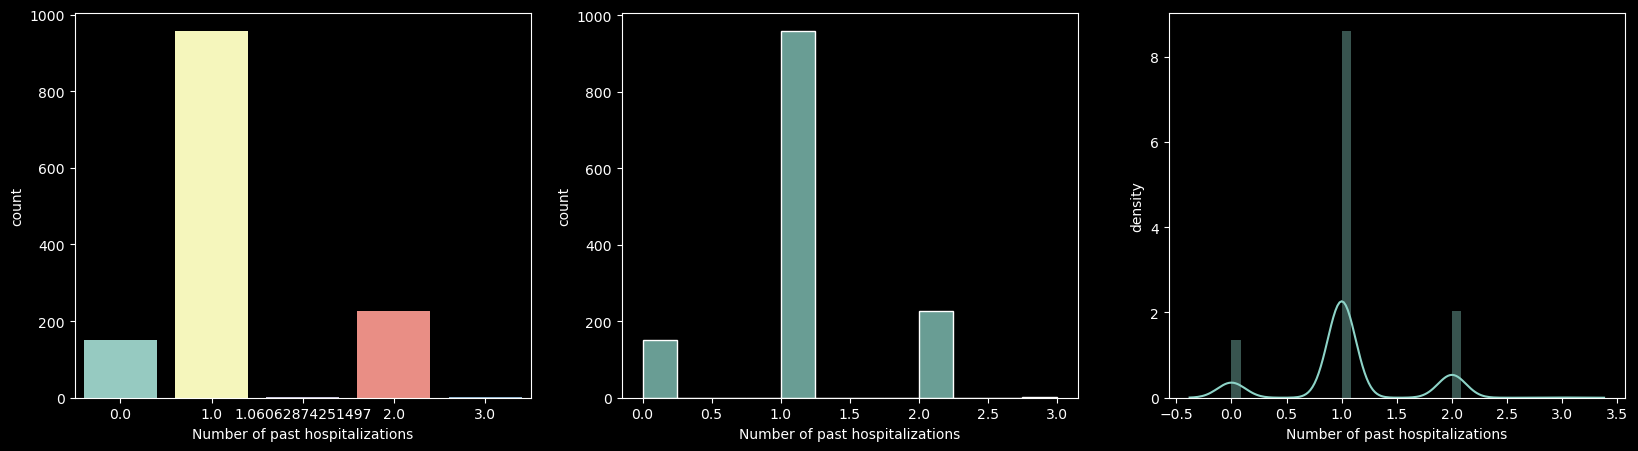

In [52]:
plt.figure(figsize=(20,5))
#first plot
plt.subplot(1,3,1)
sns.countplot(x=data["NUmber_of_past_hospitalizations"])
plt.xlabel("Number of past hospitalizations")
plt.ylabel("count")
#second plot
plt.subplot(1,3,2)
sns.histplot(x=data["NUmber_of_past_hospitalizations"])
plt.xlabel("Number of past hospitalizations")
plt.ylabel("count")
#third plot
plt.subplot(1,3,3)
sns.distplot(x=data["NUmber_of_past_hospitalizations"])
plt.xlabel("Number of past hospitalizations")
plt.ylabel("density")

# Encoding

In [53]:
data.dtypes

age                                float64
sex                                 object
bmi                                float64
children                           float64
smoker                              object
Claim_Amount                       float64
past_consultations                 float64
num_of_steps                       float64
Hospital_expenditure               float64
NUmber_of_past_hospitalizations    float64
Anual_Salary                       float64
region                              object
charges                            float64
dtype: object

In [54]:
data.head(10)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.543130,17.0,715428.00000,4.720921e+06,0.0,5.578497e+07,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.674370,7.0,699157.00000,4.329832e+06,0.0,1.370089e+07,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.627590,19.0,702341.00000,6.884861e+06,0.0,7.352311e+07,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.393320,11.0,700250.00000,4.274774e+06,0.0,7.581968e+07,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.859410,16.0,711584.00000,3.787294e+06,0.0,2.301232e+07,southeast,1137.0110
5,18.0,male,34.43,0.0,no,26488.339120,20.0,717162.00000,3.696161e+06,0.0,3.696849e+08,southeast,1137.4697
6,18.0,male,37.29,0.0,no,33217.365480,13.0,699159.00000,8.765292e+05,0.0,6.906067e+07,southeast,1141.4451
7,18.0,male,41.14,0.0,no,46770.585330,12.0,706423.00000,4.486741e+06,0.0,9.719378e+07,southeast,1146.7966
8,18.0,male,43.01,0.0,no,9715.650411,17.0,910004.69588,9.216440e+06,0.0,5.888197e+07,southeast,1149.3959
9,18.0,male,53.13,0.0,no,17046.585150,19.0,704425.00000,1.458972e+06,0.0,9.426182e+07,southeast,1163.4627


In [55]:
data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [57]:
for i in data.select_dtypes("object"):
    data[i]=le.fit_transform(data[i])

In [58]:
data

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2,1121.87390
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2,1131.50660
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2,1135.94070
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2,1136.39940
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,0,35.530,0.0,1,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,1,55135.40209
1334,31.0,0,38.095,1.0,1,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,0,58571.07448
1335,52.0,1,34.485,3.0,1,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,1,60021.39897
1336,45.0,1,30.360,0.0,1,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,2,62592.87309


# feature selection

In [59]:
#feature selection based on correlation
data.corr()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
age,1.000000,-0.019105,0.112161,0.041448,-0.028868,0.122828,0.168311,0.512985,0.136710,0.359391,0.163540,0.004659,0.293604
sex,-0.019105,1.000000,0.045170,0.018587,0.076185,-0.003884,0.050403,0.010342,0.070877,0.000382,0.072710,0.004588,0.057292
bmi,0.112161,0.045170,1.000000,0.007923,0.003610,0.093313,0.130667,0.135903,0.256858,0.137060,0.241502,0.158261,0.198691
children,0.041448,0.018587,0.007923,1.000000,0.009465,0.041276,0.054688,0.163307,0.025128,0.185505,0.039983,0.015135,0.070686
smoker,-0.028868,0.076185,0.003610,0.009465,1.000000,0.334406,0.502836,0.665711,0.662900,0.588812,0.742011,-0.002181,0.787251
Claim_Amount,0.122828,-0.003884,0.093313,0.041276,0.334406,1.000000,0.271482,0.398342,0.370310,0.379731,0.403925,0.009028,0.435635
past_consultations,0.168311,0.050403,0.130667,0.054688,0.502836,0.271482,1.000000,0.559682,0.542098,0.500268,0.590880,-0.001866,0.627592
num_of_steps,0.512985,0.010342,0.135903,0.163307,0.665711,0.398342,0.559682,1.000000,0.624543,0.845125,0.734412,-0.041920,0.889848
Hospital_expenditure,0.136710,0.070877,0.256858,0.025128,0.662900,0.370310,0.542098,0.624543,1.000000,0.652102,0.959483,0.029649,0.871927
NUmber_of_past_hospitalizations,0.359391,0.000382,0.137060,0.185505,0.588812,0.379731,0.500268,0.845125,0.652102,1.000000,0.736124,-0.031299,0.820844


<AxesSubplot:>

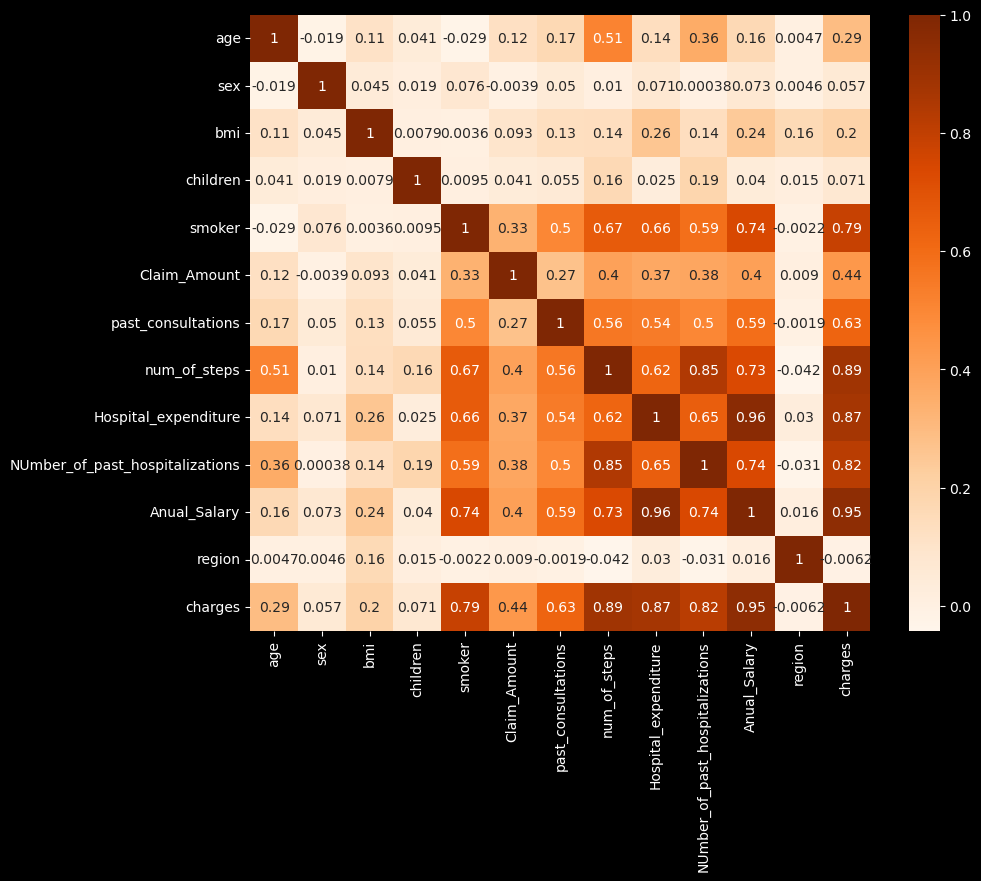

In [68]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="Oranges")

# Model building

In [76]:
x1 = data.drop(["age", "sex", "bmi", "children", "Claim_Amount", "region", "charges"], axis = 1)
x2=data.drop("charges",axis=1)
y1=data["charges"]
y2=data["charges"]

In [77]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [78]:
model1=LinearRegression()
model1.fit(x_train1,y_train1)

LinearRegression()

In [79]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.3,random_state=42)

In [81]:
model2=LinearRegression()
model2.fit(x_train2,y_train2)

LinearRegression()

In [82]:
y_pred1=model1.predict(x_test1)
y_pred2=model2.predict(x_test2)

In [87]:
r2_score(y_test1,y_pred1)

0.977957893846099

In [88]:
r2_score(y_test2,y_pred2)

0.9789814831283146

In [93]:
mse=mean_squared_error(y_test2,y_pred2)
mse

333163953.28114295

In [94]:
np.sqrt(mse)

18252.779330314137